Функция генерации определенного количества СВ
Выборки: 10, 100, 1000, 10000, 100000

Случайные величины:
1) Биномиальное распределение
2) Распределение Бернулли
3) Геометрическое распределение
4) Распределение Пуассона
5) Экспоненциальное распределение
6) Равномерное распределение
7) Нормальное распределение
8) Распределение хи-квадрат
9) Распределение Стьюдента
10) Распределение Фишера
11) Распределение Вейбулла 

Для выборок:
1) посчитать оценки (мат ожидание, СКО в 2 видах - смещенное, несмещенное, медиана)
2) добавить шум в данные (до 20% мощности сигнала). Попробовать вписать данные в функцию, посчитать корреляцию и ковариацию для исходного и зашумленного ряда
    1) шум распределен по этому же закону
    2) по некоторому другому

In [ ]:
import scipy.stats as sps
import scipy.ndimage as snd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

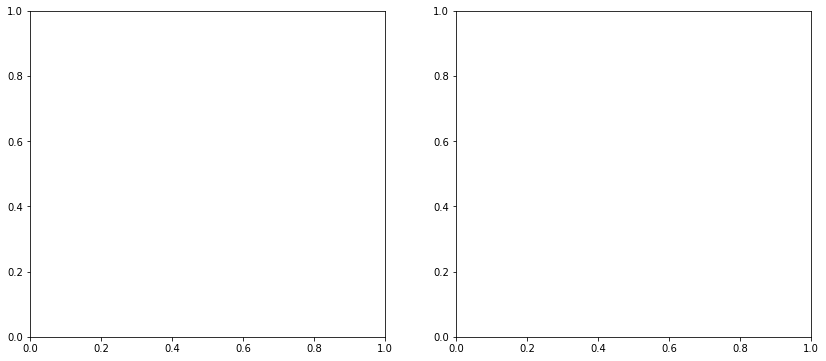

In [ ]:
fig = plt.figure(figsize=(14,6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

yMax = 1
xMax = 1

#line1, = ax1.plot([], [], 'r', lw=2)     # ax.plot returns a list of 2D line objects
#line2, = ax2.plot([], [], 'g', lw=2)
means = []
#line3, = ax3.plot([], [], 'b', lw=2)

# список размеров выборки
data_size = [10, 20, 40, 100, 1000, 10000, 100000]

In [ ]:
# n - кол-во испытаний
# p - вероятность успеха
# mu
# df
# c
DefaultModels = {
    "binomial" : sps.binom(n = 10, p = 0.5),
    "bernoulli": sps.bernoulli(p = 0.5),
    "geom": sps.geom(p = 0.5),
    "poisson" : sps.poisson(mu = 10),
    "exponential" : sps.expon(),
    "uniform" : sps.uniform(),
    "normal" : sps.norm(),
    "hi-squared" : sps.chi2(df = 55),
    "student" : sps.t(df = 2.74),
    "fisher" : sps.f(3, 3),
    "weibull" : sps.weibull_min(c = 1.79)
}
ListOfModels = list(DefaultModels.keys())

discrete = [0, 1, 2, 3]

In [ ]:
# animation function. This is called sequentially
def drawframe(n, *args):
    #print('#####################')
    #print("FRAME = ", n)

    (means, lawName) = args
    #rvs, ideal = BinomLaw(10, 0.5, data_size[n])
    givenLaw = DefaultModels[lawName]
    lawIndex = ListOfModels.index(lawName)
    rvs = givenLaw.rvs(data_size[n])
    means.append(rvs.mean())

    xMin = givenLaw.ppf(0.01)
    xMax = givenLaw.ppf(0.99)

    xTicks = []
    probFun = []

    if lawIndex in discrete:
        xTicks = np.arange(xMin, xMax)
        probFun = givenLaw.pmf(xTicks)
    else:
        xTicks = np.linspace(xMin, xMax, 100)
        probFun = givenLaw.pdf(xTicks)

    #xTicks = np.linspace(xMin, xMax, 10)

    ax1.clear()
    #ax1.set_xticks(xTicks)
    ax1.set(xlim = (xMin, xMax), ylim = (0, 1), title = "Выборка: " + str(data_size[n]))
    ax1.hist(rvs, bins = 10, range=(xMin, xMax), rwidth=0.8, density=True)
    ax1.plot(xTicks, probFun, 'r-', lw = 2)

    ax2.clear()
    ax2.set(xlim = (0, len(data_size)),
            ylim = (min(means) - 0.25, max(means) + 0.25),
            xticklabels=list(map(str, data_size))
            )
    ax2.hlines(y=givenLaw.mean(), xmin=0, xmax=len(data_size)+1, lw=1, colors='red')
    ax2.plot(means)


    #return line2,

In [ ]:
from matplotlib import animation, rc


def AnimateParam(lawName):
    means = []
    args = (means, lawName)
    anim = animation.FuncAnimation(fig, drawframe, fargs=args, frames = len(data_size), interval = 1000, blit=False)
    rc('animation', html='jshtml')
    #plt.show()
    return anim


* Название
* Для чего используется
* Вид распределения, формула
* Описание параметров, разумные значения параметров
* Аналитическое выражение,
* Функция плотности распределения
* Формулы для МО, дисперсии, СКО
* Основные свойства (если сумм. ряд с этим законом, как будет выглядеть МО, симметрия, дисперсия, эксцесс)

In [ ]:
AnimateParam("binomial")

In [ ]:
AnimateParam("bernoulli")

#####################
FRAME =  0
#####################
FRAME =  0
#####################
FRAME =  1
#####################
FRAME =  2
#####################
FRAME =  3
#####################
FRAME =  4
#####################
FRAME =  5
#####################
FRAME =  6


In [ ]:
AnimateParam("poisson")

In [ ]:
AnimateParam("exponential")

In [ ]:
AnimateParam("uniform")

In [ ]:
AnimateParam("normal")

In [ ]:
AnimateParam("hi-squared")

In [ ]:
AnimateParam("student")

In [ ]:
AnimateParam("fisher")

In [ ]:
AnimateParam("weibull")